## Oversampling and Downsampling Notebook



In this notebook we are going to check if we have imbalanced classification in our dataset and proceed to resample and  
adjust the label distribution of the dataset. we will use Random


Import the modules, set the working directories and load the data.

In [302]:
import numpy as np
import pandas as pd
import datetime
import rasterio
import seaborn as sns
from scipy import stats 
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from calendar import monthrange
from calendar import month_name
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import imblearn
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
sns.set_theme(context='notebook', style='darkgrid', palette='crest', font='helvetica')
cmap = sns.color_palette('crest')
sns.set(rc = {"figure.dpi":300})
sns.set(rc = {"figure.figsize":(3,1)})
sns.set(font_scale = 0.5)
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [303]:

df = pd.read_csv("../data/data_afterFE_wo.csv")

In [305]:
def train_test_split_fields(df:pd.DataFrame, train_size=0.7, random_state=42) -> pd.DataFrame:
    """Splits a data frame into train and test data frames.

    Args:
        df (pd.DataFrame): The data frame to be splitted.
        train_size (float, optional): This defines the size of the train data set. Defaults to 0.7, so 70%.
        random_state (float, optional): The random seed of used for the split. 

    Returns:
        pd.DataFrame: A train and a test data frame. 
    """
    # Set a random seed
    np.random.seed(random_state)
    # Split the df into train and test using the field_ids
    n_fields = df["field_id"].nunique()
    train_fields = np.random.choice(df["field_id"].unique(), int(n_fields * train_size), replace=False)
    test_fields = df["field_id"].unique()[~np.in1d(df["field_id"].unique(), train_fields)]
    df_train = df[df["field_id"].isin(train_fields)]
    df_test = df[df["field_id"].isin(test_fields)]
    return df_train, df_test

split the dataset into two parts: training and test sets by exploiting the train_test_split() function, provided by the sklearn library. I set the test set size to 0.7

In [306]:
df_train,df_test = train_test_split_fields(df,0.7)

Balancing is applied only to the training set

In [307]:
df_train

,PVR_10,PVR_11,PVR_4,PVR_5,PVR_6,PVR_7,PVR_8,PVR_9,WET_10,WET_11,...,B08_10,B08_11,B08_4,B08_5,B08_6,B08_7,B08_8,B08_9,field_id,label
0,-0.064742,-0.069020,-0.129347,-0.118203,-0.027443,0.040792,0.171888,0.038998,1.518052,1.962072,...,123.218917,104.715434,59.430869,62.701769,147.853693,143.522778,109.565916,78.647108,1,4
1,-0.064742,-0.069020,-0.129347,-0.118203,-0.027443,0.040792,0.171888,0.038998,1.518052,1.962072,...,123.218917,104.715434,59.430869,62.701769,147.853693,143.522778,109.565916,78.647108,1,4
2,-0.064742,-0.069020,-0.129347,-0.118203,-0.027443,0.040792,0.171888,0.038998,1.518052,1.962072,...,123.218917,104.715434,59.430869,62.701769,147.853693,143.522778,109.565916,78.647108,1,4
3,-0.064742,-0.069020,-0.129347,-0.118203,-0.027443,0.040792,0.171888,0.038998,1.518052,1.962072,...,123.218917,104.715434,59.430869,62.701769,147.853693,143.522778,109.565916,78.647108,1,4
4,-0.064742,-0.069020,-0.129347,-0.118203,-0.027443,0.040792,0.171888,0.038998,1.518052,1.962072,...,123.218917,104.715434,59.430869,62.701769,147.853693,143.522778,109.565916,78.647108,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696731,-0.170170,-0.179032,-0.192470,-0.175265,-0.158848,-0.145301,-0.100666,-0.095999,-32.277553,-52.659178,...,120.630504,111.308009,108.422735,106.291368,111.376345,108.082668,105.880917,112.173187,122736,9
696732,-0.170170,-0.179032,-0.192470,-0.175265,-0.158848,-0.145301,-0.100666,-0.095999,-32.277553,-52.659178,...,120.630504,111.308009,108.422735,106.291368,111.376345,108.082668,105.880917,112.173187,122736,9
696733,-0.170170,-0.179032,-0.192470,-0.175265,-0.158848,-0.145301,-0.100666,-0.095999,-32.277553,-52.659178,...,120.630504,111.308009,108.422735,106.291368,111.376345,108.082668,105.880917,112.173187,122736,9
696734,-0.170170,-0.179032,-0.192470,-0.175265,-0.158848,-0.145301,-0.100666,-0.095999,-32.277553,-52.659178,...,120.630504,111.308009,108.422735,106.291368,111.376345,108.082668,105.880917,112.173187,122736,9


A Countplot is created providing a visualization of the label breakdown of the dataset.

This gives a clearer idea that we have a high count of  crop type represented by label 4 than the rest crop types in the dataset

In [309]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

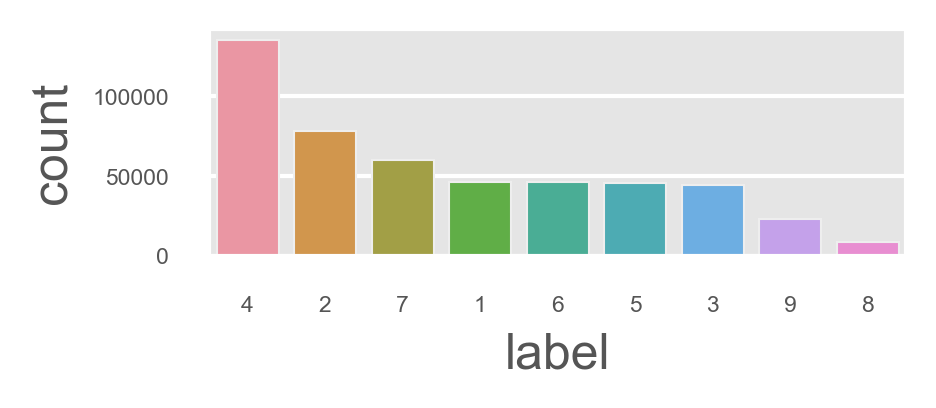

In [357]:

ax = sns.countplot(x="label", data=df_train, order = df_train['label'].value_counts().index)


In [358]:
print(Counter(df_train.label))

Counter({4: 135448, 2: 78208, 7: 60136, 1: 46552, 6: 46016, 5: 45608, 3: 44264, 9: 23056, 8: 8424})


## Dataset 1
For this Dataset I will undersample the class distribution to the lowest class count(8)

In [311]:
# first define the target and features
X= df_train.drop('label',axis=1)
y = df_train['label']

Now I can undersample the most represented classes. I exploit the imblearn library

In [312]:

rus = RandomUnderSampler()
#resampling X,y
X_rus, y_rus= rus.fit_resample(X, y)

In [260]:
X_rus

,PVR_10,PVR_11,PVR_4,PVR_5,PVR_6,PVR_7,PVR_8,PVR_9,WET_10,WET_11,...,B03_9,B08_10,B08_11,B08_4,B08_5,B08_6,B08_7,B08_8,B08_9,field_id
0,-0.116949,-0.098934,-0.203729,-0.138132,-0.082030,-0.030091,0.012317,-0.095612,-52.041639,-51.849407,...,49.030833,84.179628,90.309240,105.738413,109.880207,116.739722,94.073707,111.621238,86.083268,101
1,-0.102367,-0.099743,-0.105197,-0.113052,-0.064069,-0.003273,0.024247,-0.028507,-34.588650,-52.860947,...,29.571372,110.057013,98.334845,93.052699,81.237550,104.595323,140.070697,114.329561,90.396052,60218
2,-0.159005,-0.117862,-0.186302,-0.164524,-0.076628,-0.069612,-0.046804,-0.071602,-34.075493,-38.381222,...,83.562740,97.166570,102.869725,103.586013,105.053293,112.683520,95.375256,89.079513,119.090286,23078
3,-0.133317,-0.146560,-0.220563,-0.141685,-0.068145,-0.034342,0.017527,-0.087422,-42.667648,-46.406374,...,31.240322,81.330109,61.947312,79.404299,102.785485,118.651614,99.868817,102.954838,75.211291,8049
4,-0.035735,-0.026433,-0.001007,-0.000104,0.003355,0.013359,0.009914,0.013795,-23.073632,2.993567,...,22.833333,114.164530,127.957264,76.581193,59.625000,129.217947,93.179484,101.211538,82.586539,23922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75811,-0.140387,-0.118148,-0.192562,-0.099705,-0.144189,-0.123332,-0.057805,-0.107597,-54.859919,-38.264134,...,63.016217,77.981983,100.611613,53.333333,60.166667,104.729728,96.897040,126.678679,89.481081,11462
75812,-0.125261,-0.159578,-0.185320,-0.151866,-0.157921,-0.154947,-0.141598,-0.089816,-22.043647,-51.760481,...,88.780033,117.060176,89.426032,67.634070,74.977070,98.468941,81.725399,97.211257,112.707258,39367
75813,-0.120443,-0.118993,-0.176245,-0.142644,-0.108119,-0.155311,-0.118961,-0.086106,-51.977665,-38.916380,...,108.113636,106.110140,125.128099,102.568183,88.769480,123.613636,103.732955,77.460227,131.492422,115114
75814,-0.172564,-0.164530,-0.200410,-0.185938,-0.096141,-0.085425,-0.032961,-0.094130,-25.710185,-39.616799,...,42.134317,109.459592,106.101265,105.921940,102.775769,108.216247,104.459388,135.062764,95.096344,87223


In [259]:
print(Counter(y_rus))

Counter({1: 8424, 2: 8424, 3: 8424, 4: 8424, 5: 8424, 6: 8424, 7: 8424, 8: 8424, 9: 8424})


In [313]:
#create a dataset from undersampled features
df_undersampled = pd.concat([X_rus,y_rus],axis= 1)
df_undersampled


,PVR_10,PVR_11,PVR_4,PVR_5,PVR_6,PVR_7,PVR_8,PVR_9,WET_10,WET_11,...,B08_10,B08_11,B08_4,B08_5,B08_6,B08_7,B08_8,B08_9,field_id,label
0,-0.116949,-0.098934,-0.203729,-0.138132,-0.082030,-0.030091,0.012317,-0.095612,-52.041639,-51.849407,...,84.179628,90.309240,105.738413,109.880207,116.739722,94.073707,111.621238,86.083268,101,1
1,-0.102367,-0.099743,-0.105197,-0.113052,-0.064069,-0.003273,0.024247,-0.028507,-34.588650,-52.860947,...,110.057013,98.334845,93.052699,81.237550,104.595323,140.070697,114.329561,90.396052,60218,1
2,-0.159005,-0.117862,-0.186302,-0.164524,-0.076628,-0.069612,-0.046804,-0.071602,-34.075493,-38.381222,...,97.166570,102.869725,103.586013,105.053293,112.683520,95.375256,89.079513,119.090286,23078,1
3,-0.133317,-0.146560,-0.220563,-0.141685,-0.068145,-0.034342,0.017527,-0.087422,-42.667648,-46.406374,...,81.330109,61.947312,79.404299,102.785485,118.651614,99.868817,102.954838,75.211291,8049,1
4,-0.035735,-0.026433,-0.001007,-0.000104,0.003355,0.013359,0.009914,0.013795,-23.073632,2.993567,...,114.164530,127.957264,76.581193,59.625000,129.217947,93.179484,101.211538,82.586539,23922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75811,-0.140387,-0.118148,-0.192562,-0.099705,-0.144189,-0.123332,-0.057805,-0.107597,-54.859919,-38.264134,...,77.981983,100.611613,53.333333,60.166667,104.729728,96.897040,126.678679,89.481081,11462,9
75812,-0.125261,-0.159578,-0.185320,-0.151866,-0.157921,-0.154947,-0.141598,-0.089816,-22.043647,-51.760481,...,117.060176,89.426032,67.634070,74.977070,98.468941,81.725399,97.211257,112.707258,39367,9
75813,-0.120443,-0.118993,-0.176245,-0.142644,-0.108119,-0.155311,-0.118961,-0.086106,-51.977665,-38.916380,...,106.110140,125.128099,102.568183,88.769480,123.613636,103.732955,77.460227,131.492422,115114,9
75814,-0.172564,-0.164530,-0.200410,-0.185938,-0.096141,-0.085425,-0.032961,-0.094130,-25.710185,-39.616799,...,109.459592,106.101265,105.921940,102.775769,108.216247,104.459388,135.062764,95.096344,87223,9


Eventually I have a balanced dataset

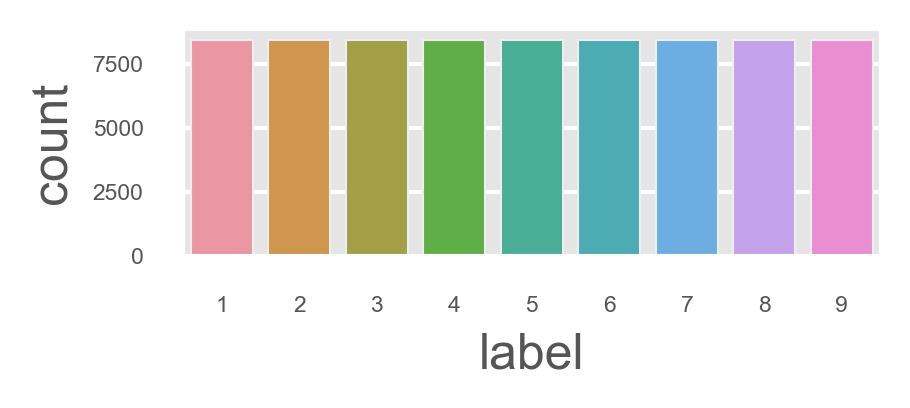

In [314]:
ax = sns.countplot(x="label", data=df_undersampled, order = df_undersampled['label'].value_counts().index)

#### The first strategy involves the creation of 2 different datasets, which undersamples the majority classes and oversamples the minority classes.In this specific dataset we set the the class distribution equal to the number of desired samples for each class

## Dataset 2
for Dataset 2 we will resample to Class 7

In [315]:

n_class_7 = df_train[df_train.label==7].shape[0] # define desired the sample size
#n_class_7
class_7 = df_train[df_train.label==7] #dataset containing features of label 7

#### Undersample class(2,4) to class 7

In [316]:
# subset of classes i want to downsample
df_under = df_train.loc[df_train['label'].isin([2,4])]
df_under
# from our subset define the target and features
X_under= df_under.drop('label',axis=1)
y_under = df_under['label']
# undersample the X_under and y_under
strategy = { 2:n_class_7, 4:n_class_7}
under = RandomUnderSampler(sampling_strategy=strategy)
X_under_sampling, y_under_sampling = under.fit_resample(X_under, y_under)
print(f"underSampling: {Counter(y_under_sampling)}")

underSampling: Counter({2: 60136, 4: 60136})


In [317]:
# create a set of undersampled data by merging the above sampled feature and Target
df_undersampled = pd.concat([X_under_sampling,y_under_sampling],axis= 1)
df_undersampled

,PVR_10,PVR_11,PVR_4,PVR_5,PVR_6,PVR_7,PVR_8,PVR_9,WET_10,WET_11,...,B08_10,B08_11,B08_4,B08_5,B08_6,B08_7,B08_8,B08_9,field_id,label
0,-0.147899,-0.125867,-0.132908,-0.127984,-0.058683,-0.007577,0.077748,-0.050075,-52.713405,-36.297107,...,82.670563,103.953953,93.135883,88.304545,94.666435,106.600077,115.297528,102.483806,83822,2
1,-0.102818,-0.076510,-0.144876,-0.111670,-0.022521,0.058691,0.220280,0.032255,-23.322525,-14.866566,...,109.531413,129.493893,83.924957,88.878271,150.160558,121.253053,105.014835,88.630891,118039,2
2,-0.175545,-0.155038,-0.199772,-0.179433,-0.080381,-0.015517,0.034690,-0.068882,-21.230696,-42.450104,...,78.006583,65.003428,73.125096,80.542388,108.074207,83.076537,88.327764,120.771568,94306,2
3,-0.090368,-0.103128,-0.091336,-0.108920,-0.068173,0.061584,0.118516,0.023823,-27.796104,-29.746843,...,101.345679,98.443321,101.432098,75.813053,110.905350,86.784981,104.530349,104.716734,40556,2
4,-0.069692,-0.058936,-0.123728,-0.072719,-0.006010,0.017509,0.058855,0.032872,-23.610324,-16.773229,...,68.113926,81.229957,55.177215,67.889241,142.949368,143.510549,93.371308,62.737340,112620,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120267,-0.106021,-0.077564,-0.223240,-0.119819,-0.050888,-0.079126,-0.109057,-0.112144,-32.810281,-14.616398,...,93.785591,127.622396,64.065971,89.455730,140.496527,123.955730,52.028646,66.800780,54140,4
120268,-0.070773,-0.069016,-0.137541,-0.106761,-0.029855,0.043362,0.196733,0.019491,4.273163,1.221378,...,117.375080,109.844399,59.691336,68.578747,147.158758,143.149587,115.337444,90.120494,54307,4
120269,-0.058318,-0.029760,-0.190478,-0.111197,-0.026131,-0.001998,-0.047543,-0.099754,-20.702878,8.361419,...,92.970086,143.021366,62.666668,89.596154,103.615388,70.376068,70.854701,54.467949,73578,4
120270,-0.101805,-0.104038,-0.181562,-0.100576,-0.105117,-0.075858,-0.071078,-0.081830,-20.097640,-28.713380,...,111.833591,110.826153,87.368720,142.301540,89.134360,96.797950,104.726154,94.301155,84009,4


#### Oversample class(5,3,6,1,9,8) to class 7

In [322]:
## subset of classes i want to oversample
df_over = df_train.loc[df_train['label'].isin([5,3,6,1,9,8])]
# from our subset define the target and features
X_over= df_over.drop('label',axis=1)
y_over = df_over['label']
# overrsample the X_under and y_under
strategy = {1:n_class_7, 3:n_class_7, 5:n_class_7, 6:n_class_7,8:n_class_7,9:n_class_7}
over = RandomOverSampler(sampling_strategy=strategy)
X_over_sampling, y_over_sampling = over.fit_resample(X_over, y_over)
print(f"Oversampled: {Counter(y_over_sampling)}")

Oversampled: Counter({8: 60136, 3: 60136, 6: 60136, 1: 60136, 5: 60136, 9: 60136})


In [323]:
# create a set of oversampled data by merging the above sampled feature and Target
df_overrsampled = pd.concat([X_over_sampling,y_over_sampling],axis= 1)
df_overrsampled

,PVR_10,PVR_11,PVR_4,PVR_5,PVR_6,PVR_7,PVR_8,PVR_9,WET_10,WET_11,...,B08_10,B08_11,B08_4,B08_5,B08_6,B08_7,B08_8,B08_9,field_id,label
0,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
1,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
2,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
3,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
4,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360811,-0.113147,-0.091762,-0.142072,-0.143988,-0.055156,-0.136561,-0.121091,-0.059755,-23.206290,-17.260716,...,124.891530,129.075996,91.108891,98.612319,126.516480,84.498294,97.261401,119.369406,2020,9
360812,-0.130177,-0.112917,-0.145122,-0.148692,-0.062151,-0.132262,-0.101663,-0.077962,-43.015885,-46.386254,...,103.938896,99.530251,101.834110,74.867648,121.013162,94.702124,102.698810,124.387788,2937,9
360813,-0.135713,-0.131435,-0.166708,-0.149371,-0.110594,-0.143196,-0.121374,-0.088341,-51.753632,-57.750428,...,104.487854,122.703347,88.868421,97.458647,102.004387,97.649123,89.695175,125.000001,108591,9
360814,-0.116782,-0.126112,-0.193637,-0.102747,-0.115530,-0.113248,-0.109276,-0.106306,-37.779609,-37.269136,...,109.382253,110.670947,86.777158,94.981304,119.956098,102.950055,95.873513,102.125280,66743,9


#### Balanced Dataset  

In [324]:
# create a balanced dataset by merging the 3 subsset we created above
df_class7= pd.concat([df_overrsampled,df_undersampled,class_7],axis=0) 

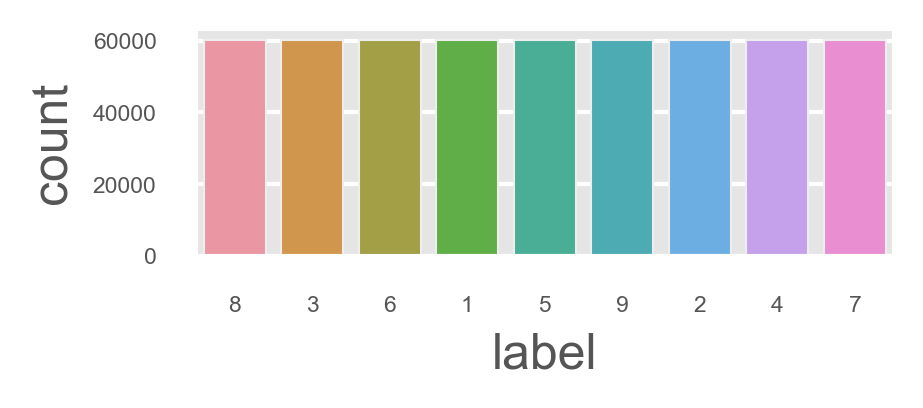

In [325]:
ax = sns.countplot(x="label", data=df_class7, order = df_class7['label'].value_counts().index)

## Dataset 3
for Dataset 3 we will repeat again the same process we did on Dataset 2 but with different subset we will resample to class 3


In [326]:
n_class_3 = df_train[df_train.label==3].shape[0]
n_class_3
class_3 = df_train[df_train.label==3]

#### Undersample class (2,4,5,6,1,7) to class 3

In [335]:

df_under = df_train.loc[df_train['label'].isin([2,4,5,6,1,7])]
df_under
X_under= df_under.drop('label',axis=1)
y_under = df_under['label']
strategy = { 2:n_class_3, 4:n_class_3,5:n_class_3,6:n_class_3,1:n_class_3,7:n_class_3}
under = RandomUnderSampler(sampling_strategy=strategy)
X_under_samp, y_under_samp = under.fit_resample(X_under, y_under)
print(f"underSampling: {Counter(y_under_samp)}")

underSampling: Counter({1: 44264, 2: 44264, 4: 44264, 5: 44264, 6: 44264, 7: 44264})


In [336]:
df_undersamp = pd.concat([X_under_samp,y_under_samp],axis= 1)
df_undersamp

,PVR_10,PVR_11,PVR_4,PVR_5,PVR_6,PVR_7,PVR_8,PVR_9,WET_10,WET_11,...,B08_10,B08_11,B08_4,B08_5,B08_6,B08_7,B08_8,B08_9,field_id,label
0,0.069840,-0.038507,-0.108703,-0.045537,-0.036302,0.016918,0.054256,0.073186,-0.900936,-12.696345,...,114.152583,103.558688,79.765259,92.313384,73.723010,134.307513,110.640847,127.697182,58639,1
1,-0.004592,-0.003914,-0.170925,-0.146694,-0.025350,-0.040348,-0.030060,-0.011103,12.364800,25.015784,...,137.138890,140.583333,64.388889,59.541666,100.240741,117.925927,104.916666,117.694445,68857,1
2,-0.242747,-0.183828,-0.031348,-0.209859,-0.078964,-0.196953,-0.155045,-0.127782,-57.100526,-51.119336,...,81.861751,95.361293,111.913976,69.010753,112.806451,57.682796,78.118280,128.206452,101664,1
3,-0.155292,-0.118029,-0.173289,-0.110305,-0.103876,-0.029166,-0.013604,-0.097094,-39.732566,-33.064075,...,69.016945,130.686901,82.739503,84.843702,104.897821,113.697523,132.613304,93.496967,31751,1
4,-0.095419,-0.119194,-0.175517,-0.060046,-0.092389,-0.060389,-0.044800,-0.048698,-31.284598,-29.007239,...,73.800689,98.549828,62.176978,114.475514,116.498281,104.408077,73.134020,80.820875,119845,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265579,-0.130089,-0.098753,-0.113569,-0.126221,-0.072028,-0.057899,0.016657,-0.043553,-43.251186,-34.785993,...,91.139462,117.787385,93.357271,89.897408,96.823849,101.107498,130.498644,105.417644,63979,7
265580,-0.113700,-0.143675,-0.158523,-0.120161,-0.171973,0.000609,0.155979,0.008279,-12.806943,-34.827904,...,97.003687,70.271902,82.573555,79.011813,78.359205,93.319335,116.216158,108.121014,20527,7
265581,-0.043124,-0.152547,-0.126218,-0.123294,-0.143831,0.049287,0.155091,0.160307,7.808216,-38.564619,...,102.600607,80.867123,79.977221,72.746392,112.284738,117.057958,128.636929,100.351366,60834,7
265582,-0.150472,-0.114241,-0.160212,-0.107995,-0.048204,-0.015680,0.083024,-0.041673,-29.373303,-15.209677,...,78.705128,100.920511,75.420511,95.746152,95.430768,104.999999,107.669230,80.226922,23764,7


#### Oversample class(8,9) to class 3

In [337]:
df_over = df_train.loc[df_train['label'].isin([8,9])]
df_over.label.unique()
X_over= df_over.drop('label',axis=1)
y_over = df_over['label']
strategy = {8:n_class_3,9:n_class_3}
over = RandomOverSampler(sampling_strategy=strategy)
X_over_samp, y_over_samp = over.fit_resample(X_over, y_over)
print(f"Oversampled: {Counter(y_over_samp)}")

Oversampled: Counter({8: 44264, 9: 44264})


In [338]:
df_overrsamp = pd.concat([X_over_samp,y_over_samp],axis= 1)
df_overrsamp

,PVR_10,PVR_11,PVR_4,PVR_5,PVR_6,PVR_7,PVR_8,PVR_9,WET_10,WET_11,...,B08_10,B08_11,B08_4,B08_5,B08_6,B08_7,B08_8,B08_9,field_id,label
0,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
1,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
2,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
3,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
4,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88523,-0.088619,-0.094937,-0.156818,-0.109872,-0.092542,-0.112478,-0.059905,-0.102649,-36.561900,-35.338602,...,115.596492,106.874064,71.018796,60.985902,98.114039,85.911027,94.427946,66.232143,44297,9
88524,-0.143925,-0.130732,-0.204885,-0.177138,-0.105855,-0.187035,-0.124485,-0.115959,-37.728536,-42.247828,...,100.866396,95.837320,63.914473,63.919172,99.282896,60.025219,85.500001,87.929825,35357,9
88525,-0.169745,-0.146599,-0.213153,-0.131040,-0.128645,-0.195202,-0.136881,-0.101879,-55.856824,-52.765030,...,104.946887,106.178572,89.999999,112.534013,118.823410,92.727181,121.383929,119.363756,112997,9
88526,-0.092525,-0.121867,-0.144705,-0.103542,-0.106081,-0.105586,-0.076247,-0.089587,-47.193881,-47.550567,...,104.879679,104.351648,81.310618,86.487337,125.384436,93.101863,84.935236,103.500920,25153,9


#### Balanced Dataset

In [339]:
df_class3= pd.concat([df_overrsamp,df_undersamp,class_3],axis=0) 

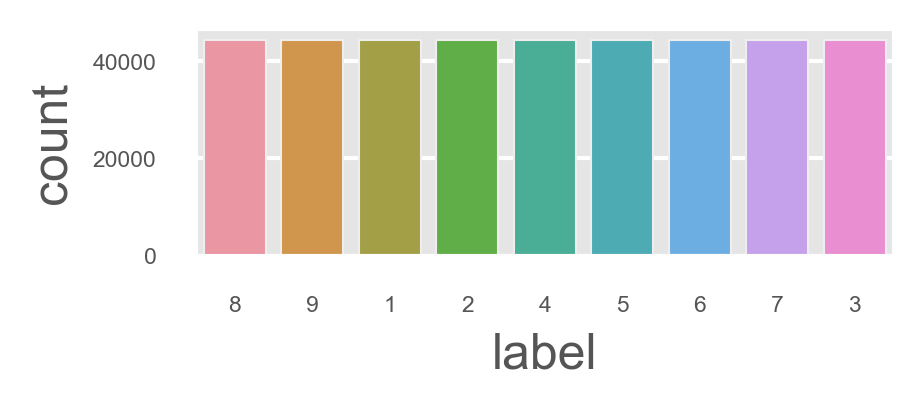

In [340]:
ax = sns.countplot(x="label", data=df_class3, order = df_class3['label'].value_counts().index)

## Dataset 4
For this dataset I will merge 2 classes(8,9) in one class and go over the same process of resample to class 1 

In [359]:
# create a copy dataset with only 8 label (8 and 9 combined together)
df_label_comb= df_train.copy()
df_label_comb
df_label_comb["label"].replace({9:8}, inplace=True)
df_label_comb.label.unique()

array([4, 7, 8, 2, 3, 6, 1, 5])

In [348]:
# use the new dataset to define the desired sample size
n_class_1 = df_label_comb[df_label_comb.label==1].shape[0]
n_class_1
class_1 = df_label_comb[df_label_comb.label==1]

#### Oversampling class(5,6,3,8) to class 1

In [351]:
# from the new dataset  create the subset of classes i want to oversample
df_over = df_label_comb.loc[df_label_comb['label'].isin([5,6,3,8])]
df_over
#from our subset define the target and features
X_over= df_over.drop('label',axis=1)
y_over = df_over['label']
# overrsample the X_under and y_under
strategy = { 8:n_class_1, 3:n_class_1,5:n_class_1,6:n_class_1}
over = RandomOverSampler(sampling_strategy=strategy)
X_overS, y_overS = over.fit_resample(X_over, y_over)
print(f"overSampling: {Counter(y_overS)}")

overSampling: Counter({8: 46552, 3: 46552, 6: 46552, 5: 46552})


In [352]:
# create a set of oversampled data by merging the above sampled feature and Target
df_overS = pd.concat([X_overS,y_overS],axis= 1)
df_overS

,PVR_10,PVR_11,PVR_4,PVR_5,PVR_6,PVR_7,PVR_8,PVR_9,WET_10,WET_11,...,B08_10,B08_11,B08_4,B08_5,B08_6,B08_7,B08_8,B08_9,field_id,label
0,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
1,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
2,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
3,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
4,-0.027601,-0.118679,-0.123696,-0.118763,-0.029688,0.046448,0.043605,0.055476,-15.935883,-27.280756,...,88.312363,88.296912,75.902870,72.561259,173.112583,130.996686,110.450332,101.652316,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186203,-0.123667,-0.101893,-0.172363,-0.100876,-0.087530,-0.084269,-0.093218,-0.090004,-37.230483,-30.644305,...,129.167499,132.464832,116.465606,116.843400,120.293630,120.622486,125.489549,112.600035,32990,8
186204,-0.126392,-0.118930,-0.148873,-0.109128,-0.083723,-0.104681,-0.082609,-0.057080,-50.097866,-48.378534,...,106.927343,82.271588,86.218130,85.938365,101.306242,92.335929,105.735062,128.736341,99819,8
186205,-0.172564,-0.164530,-0.200410,-0.185938,-0.096141,-0.085425,-0.032961,-0.094130,-25.710185,-39.616799,...,109.459592,106.101265,105.921940,102.775769,108.216247,104.459388,135.062764,95.096344,87223,8
186206,-0.055401,-0.069202,-0.110109,-0.060744,-0.116024,-0.059501,-0.071115,-0.044871,-34.162275,4.258555,...,87.753792,130.768961,81.586542,101.182322,85.011279,119.098987,96.007586,76.470243,102759,8


#### undersampling class (4,2,7) to class1

In [353]:
# repeat the same thing for undersampling
df_under = df_label_comb.loc[df_label_comb['label'].isin([4,2,7])]
df_under
X_under= df_under.drop('label',axis=1)
y_under = df_under['label']
strategy = {4:n_class_1,2:n_class_1,7:n_class_1}
under = RandomUnderSampler(sampling_strategy=strategy)
X_underS, y_underS = under.fit_resample(X_under, y_under)
print(f"underSampling: {Counter(y_underS)}")

underSampling: Counter({2: 46552, 4: 46552, 7: 46552})


In [354]:
df_underS = pd.concat([X_underS,y_underS],axis= 1)

### Balanced dataset

In [355]:
# create a balanced dataset by merging the 3 subsset we created above
df_class1= pd.concat([df_overS,df_underS,class_1],axis=0) 

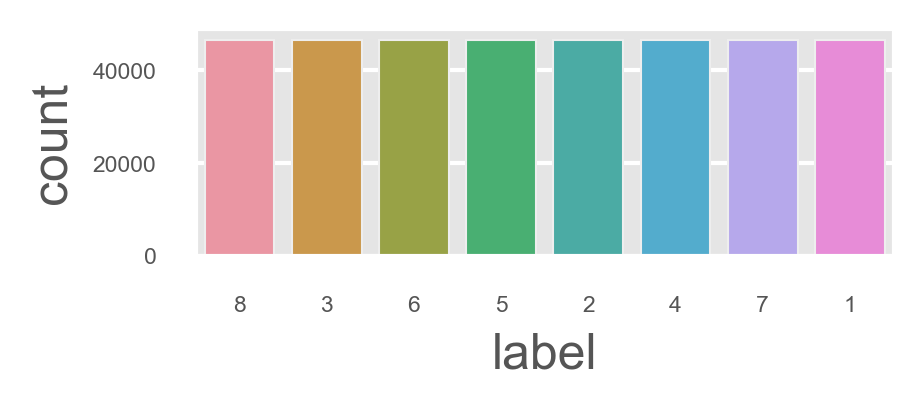

In [356]:
ax = sns.countplot(x="label", data=df_class1, order = df_class1['label'].value_counts().index)